## A4: Generate state $\frac{1}{\sqrt{3}} (|0 \rangle + |1 \rangle + |2 \rangle)$

**Time Limit:** 3 sec  
**Memory Limit:** 512 MiB  
**Score:** 200  

#### Problem Statement
Implement the operation of preparing the state $|\psi \rangle$ from the zero state on a quantum circuit $qc$ with 2 qubits.

The state is defined as

$$
|\psi \rangle = a_0 |0 \rangle + a_1 |1 \rangle + a_2 |2 \rangle = a_0 |00 \rangle + a_1 |10 \rangle + a_2 |01 \rangle
$$

where $a_0$, $a_1$, and $a_2$ denote arbitrary non-zero probability amplitudes (any values are permitted).


In [10]:
from qiskit import QuantumCircuit
import numpy as np

def solve() -> QuantumCircuit:
    qc = QuantumCircuit(2)

    theta1 = 2 * np.arccos(1/np.sqrt(3))
    theta2 = (np.pi/4)

    qc.ry(theta=theta1, qubit=0)
    qc.ry(theta=theta2, qubit=1)
    qc.cx(control_qubit=0, target_qubit=1)
    qc.ry(theta=-theta2, qubit=1)
    qc.x(qubit=0)
    

    return qc


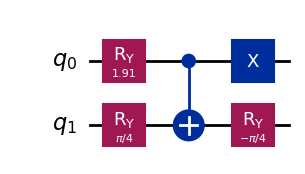

In [11]:

qc = solve()

qc.draw('mpl')

In [12]:
from qiskit.quantum_info import Statevector

statevector = Statevector(qc)

statevector.draw('latex')

<IPython.core.display.Latex object>

## Overview of the Circuit

You have two qubits initialized in the $|00\rangle$ state, and the circuit applies a sequence of operations. Let's analyze each step carefully:

### **First Rotation: $RY(\theta)$ on $q_0$**
The first qubit $q_0$ undergoes a rotation around the $Y$-axis by an angle:

$$
\theta = 2 \cdot \arccos\left(\frac{1}{\sqrt{3}}\right)
$$

This rotation moves $q_0$ from $|0\rangle$ to a superposition of $|0\rangle$ and $|1\rangle$. The exact superposition is:

$$
|q_0\rangle = \cos\left(\frac{\theta}{2}\right) |0\rangle + \sin\left(\frac{\theta}{2}\right) |1\rangle
$$

Substituting $\theta$:

$$
|q_0\rangle = \frac{1}{\sqrt{3}} |0\rangle + \frac{\sqrt{2}}{\sqrt{3}} |1\rangle
$$

### **Second Rotation: $RY(\frac{\pi}{4})$ on $q_1$**
The second qubit $q_1$ undergoes a rotation by $\frac{\pi}{4}$, which corresponds to a $45^\circ$ rotation around the $Y$-axis. This moves $q_1$ from $|0\rangle$ to:

$$
|q_1\rangle = \cos\left(\frac{\pi}{8}\right) |0\rangle + \sin\left(\frac{\pi}{8}\right) |1\rangle
$$

### **CNOT Gate (Controlled-X) between $q_0$ and $q_1$**
The CNOT gate entangles the qubits. If $q_0$ is in the $|1\rangle$ state, $q_1$ will be flipped (i.e., $|0\rangle \leftrightarrow |1\rangle$). After applying CNOT, the system becomes entangled, and the state can be written as a linear combination of basis states.

### **Third Rotation: $RY(-\frac{\pi}{4})$ on $q_1$**
This step applies a $RY(-\frac{\pi}{4})$ rotation to $q_1$, which effectively reverses the earlier $RY(\frac{\pi}{4})$ operation. This adjustment ensures that the final state remains balanced and does not introduce unwanted amplitude contributions.

## **Why is $|11\rangle$ not in the final state?**
1. **CNOT Interaction:** The CNOT gate flips $q_1$ based on $q_0$, but the initial rotations define the probability amplitudes, making it unlikely for $|11\rangle$ to appear in the final superposition.
2. **Rotation Effects:** The $RY(\frac{\pi}{4})$ and $RY(-\frac{\pi}{4})$ gates control the relative amplitudes of the states. These rotations cancel out any contribution that would lead to a nonzero $|11\rangle$ amplitude.
3. **Final State Composition:** The angles are carefully chosen so that the final state contains only the equal superposition of $|00\rangle$, $|01\rangle$, and $|10\rangle$, leaving $|11\rangle$ out.

Thus, the circuit is designed in a way that ensures $|11\rangle$ does not appear in the final quantum state.
